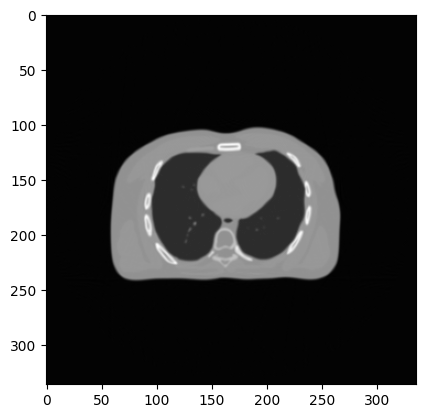

In [11]:
from util import readSinogram
import matplotlib.pyplot as plt
from skimage.transform import iradon
import scipy as sp
import numpy as np

sinogramData = readSinogram("data/sinogram-patient.txt")
angles = np.loadtxt("data/angles.txt")
sinogram = sinogramData[2].T
plt.imshow(sinogram)
ct = iradon(sinogram, theta=angles)
plt.imshow(np.rot90(ct, 2), cmap="gray")
plt.show()

In [97]:
output_size = 96
radius = output_size // 2
rs = np.linspace(-radius, radius, output_size)
teta = np.sort(np.deg2rad(angles))
P = np.fft.fft(sinogram, axis=0)
nu = np.abs(np.fft.fftfreq(P.shape[0]))
integrand = P.T * nu
pprime = np.real(np.fft.ifft(integrand.T, axis=0))
reconstructed = np.zeros((output_size,output_size))
xg, yg = np.meshgrid(rs, rs)
xp = np.linspace(-radius, radius, sinogram.shape[0])
for col, angle in zip(pprime.T, teta):
    t = yg*np.cos(angle) - xg*np.sin(angle)
    interp = np.interp(t, xp, col)
    reconstructed += interp
reconstructed = np.rot90(reconstructed.T, 3)

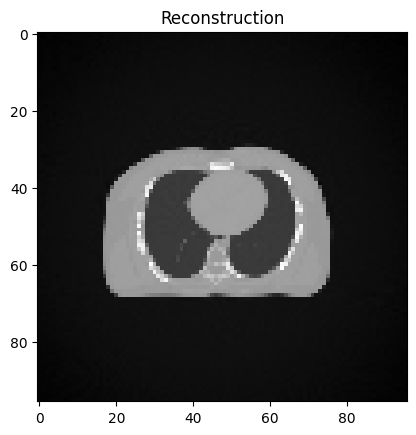

In [96]:
plt.imshow(reconstructed, cmap="gray")
plt.title("Reconstruction")
plt.show()